This interactive session is about clustering, and you will compare different clustering strategies.

Data consists of the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

## !! Important !!

To ensure consistency of the numerical results, everytime a function or constructor allows for a `random_state` argument, use `random_state=42`

## To answer the questions fill the following MS form having logged in with your PoliMi account

https://forms.office.com/e/Tafy1qJBL9

# Download the data

In [111]:
import pandas as pd

import pandas as pd
from sklearn.datasets import load_wine
import numpy as np

# Load the wine dataset
wine = load_wine()

# Convert to pandas DataFrame for easier manipulation
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)


In [112]:
## scale the features so that each column of the data matrix X has unit variance and zero mean

from sklearn.preprocessing import StandardScaler

X = wine_df
y = wine.target

X_scaled = StandardScaler().fit_transform(X) # None
# riporto X a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Before doing complex analyses, does it make sense to perform clustering? Let's look at a lower dimensional representation of the data

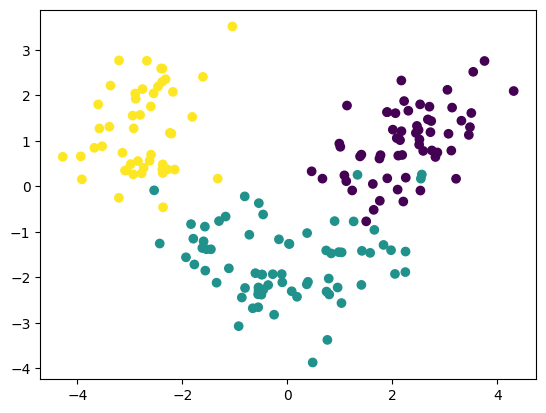

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

There seems to be some signal here!

In [114]:
# Initialize a dict "cluster method id" --> "fitted clustering"
# that will save the clusterings obtained with the different methods

clusterings = {
}

# Hierarchical clustering

First, let's perform hierarchcial clustering with either complete or average linkage.

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Function to plot dendrograms
def plot_dendrogram(linkage_matrix, title):
    plt.figure(figsize=(7, 3))
    dendrogram(linkage_matrix)
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

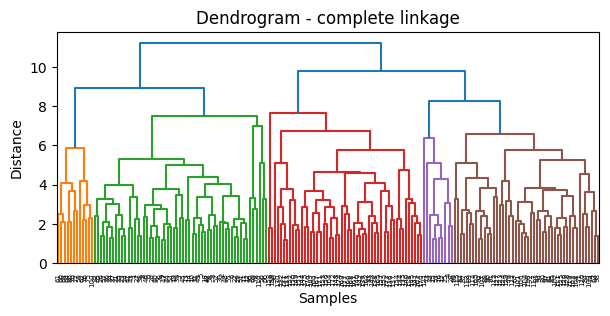

5


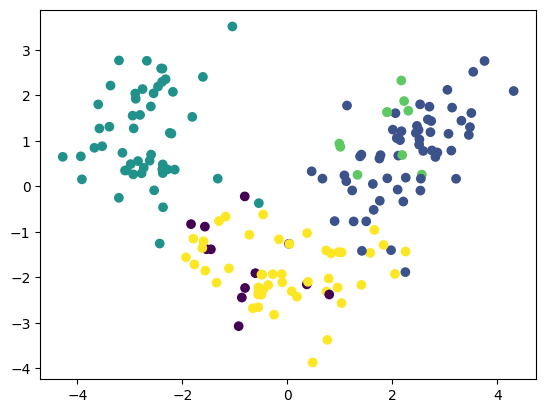

In [116]:
method = "complete"
cut_height = 8.1 # TODO insert an appropriate value here

# Obtain the dendrogram and cut it at the correct height

linkage_matrix = linkage(X_scaled, method=method)
clusters = fcluster(linkage_matrix, t=cut_height, criterion='distance')

clusterings[f"hierarchical-{method}"] = clusters

# plot the dendrogram
plot_dendrogram(linkage_matrix, title=f"Dendrogram - {method} linkage")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
numberof_clusters = len(np.unique(clusters))
print(numberof_clusters)

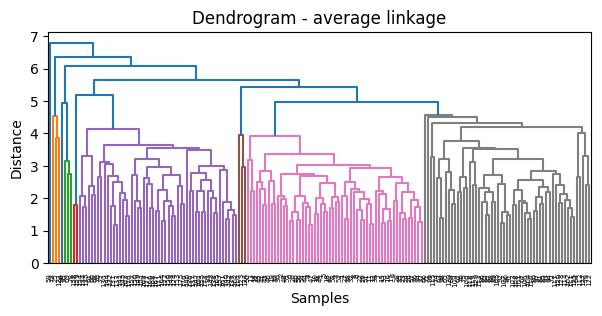

13


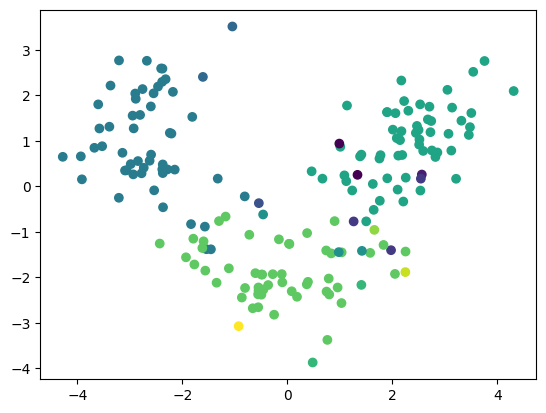

In [117]:
method = "average"
cut_height = 4.2 # TODO insert an appropriate value here

# Obtain the dendrogram and cut it at the correct height

linkage_matrix =  linkage(X_scaled, method=method)
clusters = fcluster(linkage_matrix, t=cut_height, criterion='distance') 

clusterings[f"hierarchical-{method}"] = clusters
plot_dendrogram(linkage_matrix, title=f"Dendrogram - {method} linkage")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
print(len(np.unique(clusters)))

Define the entropy for a clustering as 

$$
    \sum_{i=1}^k p_i \log(p_i)
$$
where $p_i$ is the probability that an observation belongs to cluster $i$. $p_i$ can be estimated by MLE as $p_i = N_i / n$ where $N_i$ is the number of observations in cluster i

In [118]:
# Q1: what is the entropy of the clustering obtained by cutting the dendrogram for the average linkage at height 4.2?
np.unique(clusterings['hierarchical-average'])
entropy =0

for i in np.unique(clusterings['hierarchical-average']):
    p = np.sum(clusterings['hierarchical-average'] == i) / len(clusterings['hierarchical-average'])
    if p > 0:
        entropy += p * np.log(p)

entropy

np.float64(-1.517491235335706)

In [119]:
# Q2 how many clusters do you obtain by cutting the dendrogram for the complete linkage at height 8.1?
method = "complete"
cut_height = 8.1 # TODO insert an appropriate value here

# Obtain the dendrogram and cut it at the correct height

linkage_matrix = linkage(X_scaled, method=method)
clusters = fcluster(linkage_matrix, t=cut_height, criterion='distance')

print(numberof_clusters)

5


# KMenans clustering

Now run k-means clustering and select the optimal number of clusters via the elbow criterion applied to within cluster sum of squares

In [120]:
from sklearn.cluster import KMeans

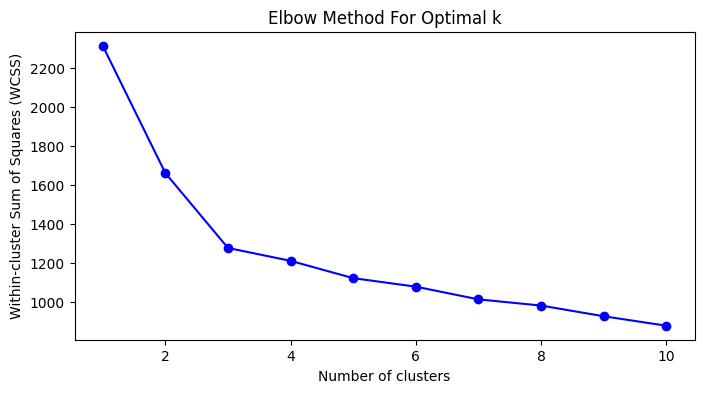

In [121]:
# KMeans Clustering
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X_scaled)
    wcss_single = kmeans.inertia_  # WCSS is the inertia of the KMeans model
    wcss.append(wcss_single)


# Plot the elbow method
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [122]:
# Q3: what is the value of the WCSS for 6 clusters?
wcss[5]  # WCSS for k=6 (index 5 since K_range starts from 1)

1079.538509158826

In [123]:
# Q4: what is the optimal number of clusters?
# The optimal number of clusters can be determined by looking for the "elbow" in the WCSS plot.
print(3)

3


In [124]:
# Update clusterings with the result of KMeans using the optimal number of clusters

optimal_k = 3
model = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
kmeans_clusters = model.fit_predict(X_scaled)

clusterings["KMeans"] = kmeans_clusters
clusterings["KMeans"]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

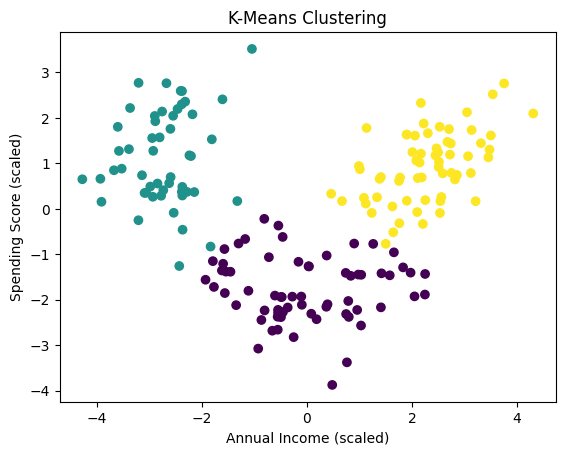

In [125]:
# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

# Gaussian Mixture Models

Now let's fit a GMM. We perform model selection using the Bayesian Information Criterion. Look up what it is and hwo it is defined

In [126]:
# Q5: Given two models with BIC 1000 and 1250, respectively, which one should be preferred?

In [127]:
from sklearn.mixture import GaussianMixture

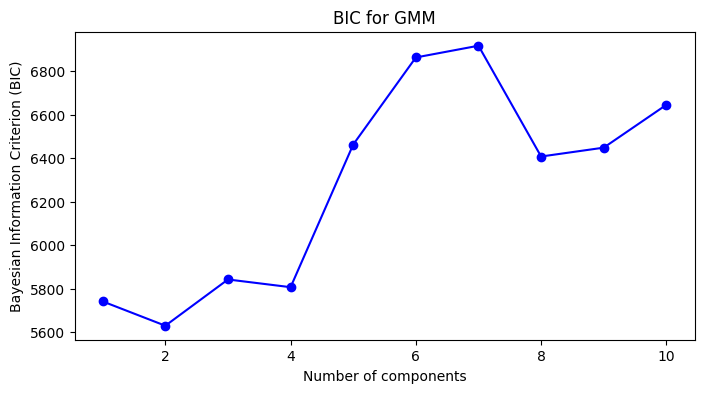

In [128]:
bic = []
n_components_range = range(1, 11)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bic_single = gmm.bic(X_scaled)
    bic.append(bic_single)
    continue

# Plot BIC to determine the optimal number of components
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, bic, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Bayesian Information Criterion (BIC)')
plt.title('BIC for GMM')
plt.show()

In [129]:
# Q6: what is the optimal number of components in the GMM according to the BIC criterion?
best_idx = np.argmin(bic)
best_idx + 1

np.int64(2)

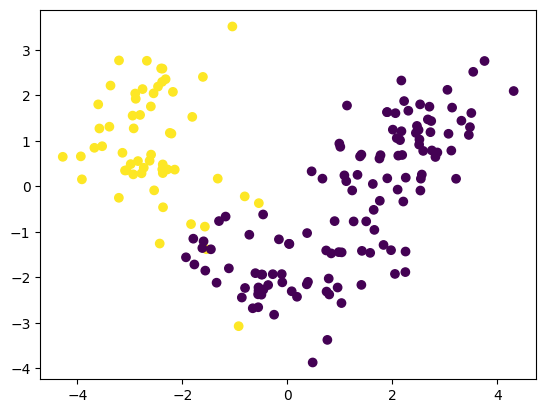

In [130]:
gmm = GaussianMixture(n_components=best_idx + 1, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)
clusterings["GMM"] = gmm_clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_clusters, cmap='viridis')

In [131]:
from sklearn.metrics import adjusted_rand_score

for name1, clusters1 in clusterings.items():
    for name2, clusters2 in clusterings.items():
        if name1 < name2:
            ari = adjusted_rand_score(clusters1, clusters2)
            print(f'Adjusted Rand Index between {name1} and {name2}: {ari:.3f}')

Adjusted Rand Index between hierarchical-average and hierarchical-complete: 0.716
Adjusted Rand Index between KMeans and hierarchical-complete: 0.731
Adjusted Rand Index between KMeans and hierarchical-average: 0.779
Adjusted Rand Index between GMM and hierarchical-complete: 0.417
Adjusted Rand Index between GMM and hierarchical-average: 0.418
Adjusted Rand Index between GMM and KMeans: 0.480


In [137]:
# Q7 Which two methods give the closest clustering according to the adjusted rand index?
for key, cluster in clusterings.items():
    print(key)
    print(adjusted_rand_score(cluster, y))

hierarchical-complete
0.6775796881583479
hierarchical-average
0.7591525818882188
KMeans
0.8974949815093207
GMM
0.43943910439476336


## Redo the same analyses for GMM and K-Means on the scores of the data on the first two principal components

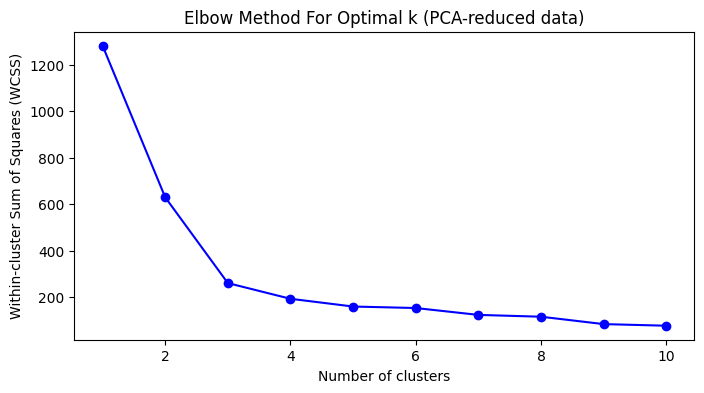

In [138]:
# KMeans on PCA-reduced data
wcss_pca = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X_pca)
    wcss_single = kmeans.inertia_  # WCSS is the inertia of the KMeans model
    wcss_pca.append(wcss_single)
    continue

# Plot the elbow method for PCA-reduced data
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss_pca, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k (PCA-reduced data)')
plt.show()

In [145]:
optimal_k_pca =  3  # Assuming the optimal number of clusters is still 3 after PCA
model_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, init='k-means++')
kmeans_pca_clusters = model_pca.fit_predict(X_pca)  
clusterings["KMeans-PCA"] = kmeans_pca_clusters

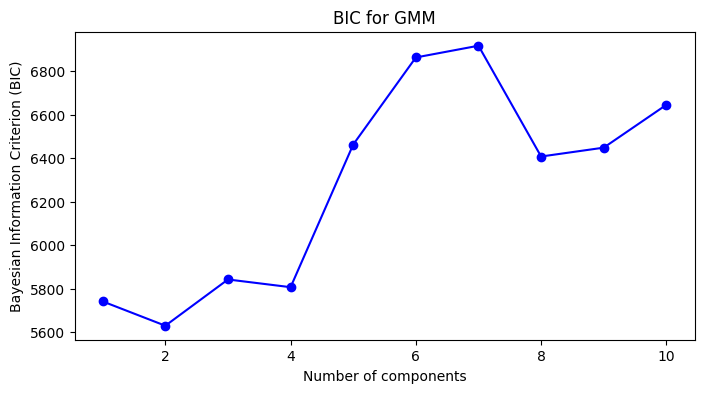

In [140]:
bic = []
n_components_range = range(1, 11)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bic_single = gmm.bic(X_scaled)
    bic.append(bic_single)

# Plot BIC to determine the optimal number of components
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, bic, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Bayesian Information Criterion (BIC)')
plt.title('BIC for GMM')
plt.show()

In [142]:
optimal_n_components = 2 
gmm_clusters_pca = GaussianMixture(n_components=optimal_n_components, random_state=42).fit_predict(X_pca)

clusterings["GMM-PCA"] = gmm_clusters_pca


In [147]:
for name1, clusters1 in clusterings.items():
    for name2, clusters2 in clusterings.items():
        if name1 < name2:
            ari = adjusted_rand_score(clusters1, clusters2)
            print(f'Adjusted Rand Index between {name1} and {name2}: {ari:.3f}')

Adjusted Rand Index between hierarchical-average and hierarchical-complete: 0.716
Adjusted Rand Index between KMeans and hierarchical-complete: 0.731
Adjusted Rand Index between KMeans and hierarchical-average: 0.779
Adjusted Rand Index between KMeans and KMeans-PCA: 0.965
Adjusted Rand Index between GMM and hierarchical-complete: 0.417
Adjusted Rand Index between GMM and hierarchical-average: 0.418
Adjusted Rand Index between GMM and KMeans: 0.480
Adjusted Rand Index between GMM and GMM-PCA: 0.726
Adjusted Rand Index between GMM and KMeans-PCA: 0.466
Adjusted Rand Index between GMM-PCA and hierarchical-complete: 0.371
Adjusted Rand Index between GMM-PCA and hierarchical-average: 0.382
Adjusted Rand Index between GMM-PCA and KMeans: 0.422
Adjusted Rand Index between GMM-PCA and KMeans-PCA: 0.408
Adjusted Rand Index between KMeans-PCA and hierarchical-complete: 0.718
Adjusted Rand Index between KMeans-PCA and hierarchical-average: 0.747


In [146]:
# Q8: what is the Adjusted Rand Index between the GMM on original data and the KMeans on the 2-dimensional features?
adjusted_rand_score(clusterings["GMM"], clusterings["KMeans-PCA"])

0.466475489474059

In [152]:
differences = []
for name1, clusters1 in clusterings.items():
    ari = adjusted_rand_score(clusters1, y)
    print(f'Adjusted Rand Index between {name1} and Cultivar : {ari:.3f}')
    differences.append(1-ari)

Adjusted Rand Index between hierarchical-complete and Cultivar : 0.678
Adjusted Rand Index between hierarchical-average and Cultivar : 0.759
Adjusted Rand Index between KMeans and Cultivar : 0.897
Adjusted Rand Index between GMM and Cultivar : 0.439
Adjusted Rand Index between GMM-PCA and Cultivar : 0.380
Adjusted Rand Index between KMeans-PCA and Cultivar : 0.896


In [166]:
differences

[0.3224203118416521,
 0.24084741811178123,
 0.10250501849067928,
 0.5605608956052366,
 0.619534284058112,
 0.10383288947940594]

In [169]:
# Q9: which methods gives the clustering that is closest to the "Cultivar" label according to the adjusted rand index?
# The method with the highest Adjusted Rand Index is the one closest to the "Cultivar" label.
best_idx = np.argmin(differences)
list(clusterings.keys())[best_idx] # Get the clustering corresponding to the best index

'KMeans'